<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_5_Multi_Linear_Regression(Toyota_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/ToyotaCorolla.csv'

In [6]:
df = pd.read_csv(url, encoding="ISO-8859-1", error_bad_lines=False)

In [9]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [10]:
df.rename(columns={"Age_08_04": "Age", "cc": "CC"},inplace=True)

In [11]:
df.columns

Index(['Id', 'Model', 'Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [15]:
cols = ['Price','Age','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight']

In [16]:
data = df[cols]

###EDA

In [17]:
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   CC             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [20]:
#Statistical analysis
display(data.describe())

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [21]:
#check for missing values
data.isna().sum()

Price            0
Age              0
KM               0
HP               0
CC               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

###Correlation Matrix

In [22]:
data.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


###Visualisation

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

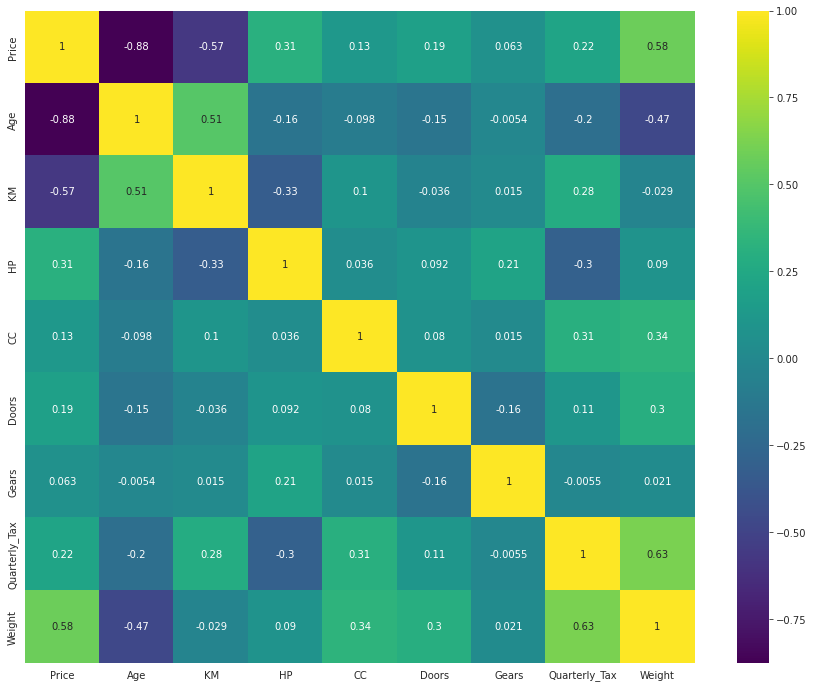

In [30]:
from seaborn.matrix import heatmap
plt.figure(figsize= (15,12))
sns.heatmap(data.corr(),cmap='viridis', annot=True)
plt.show()

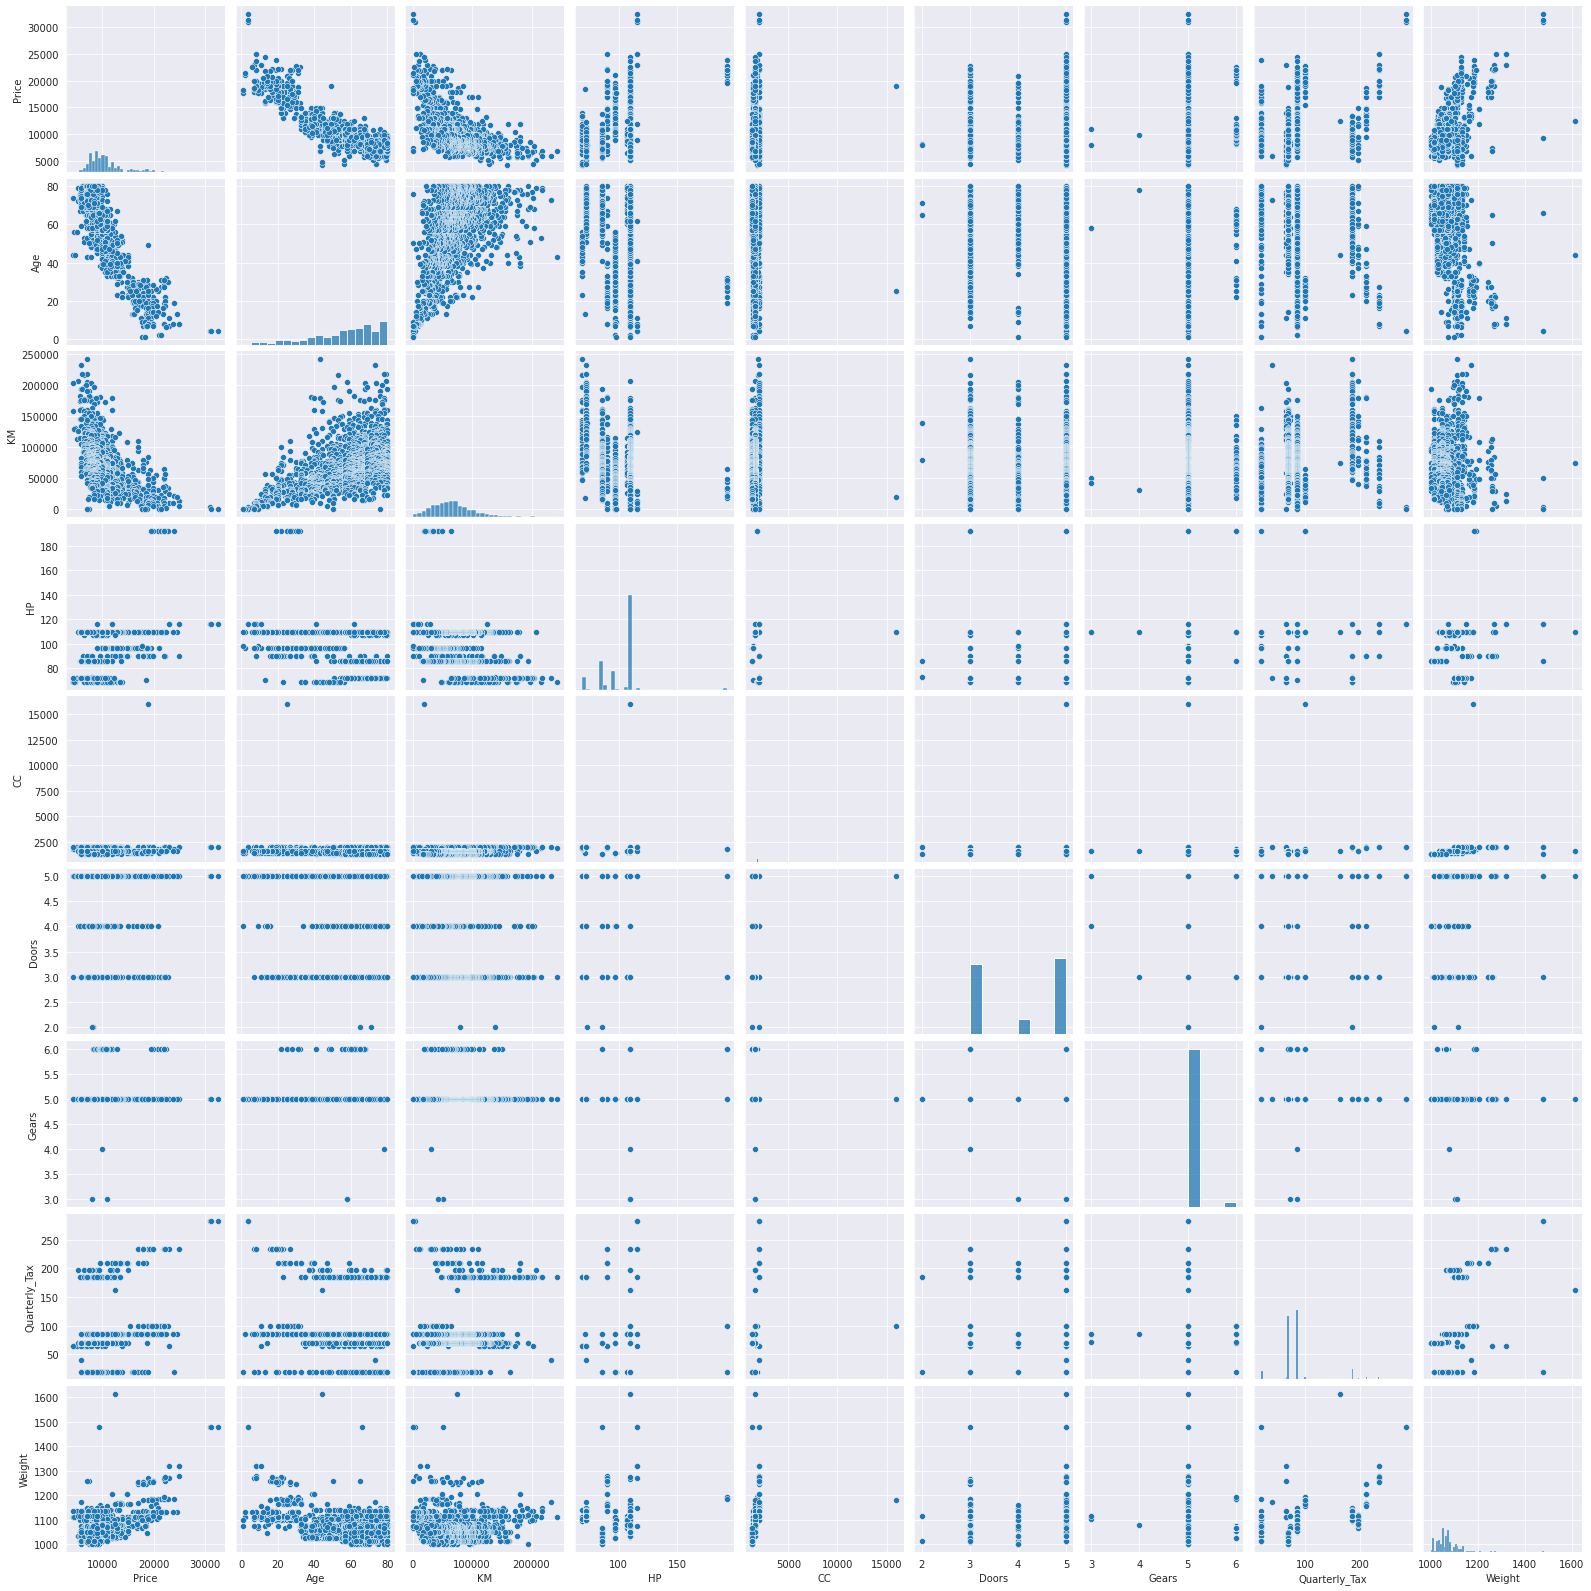

In [28]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [31]:
import plotly 
import plotly.express as px
import plotly.figure_factory as ff

In [33]:
fig = ff.create_scatterplotmatrix(data, diag='histogram', index='Price',
                                  height=1000, width=1200)
fig.show()

###Model - Using Statsmodel package

In [42]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [39]:
model1 = smf.ols('Price~Age+KM+HP+Doors+CC+Gears+Quarterly_Tax+Weight', data=data).fit()

In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:19:01   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
CC               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

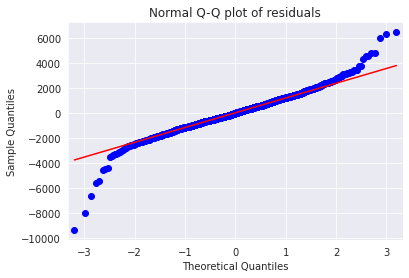

In [43]:
sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

###Model Deletion Diagnostics (checking Outliers or Influencers)

In [44]:
# Get influencers using cook's distance
(c,_)=model1.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<ipython-input-45-c74e1e31be22>:3: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



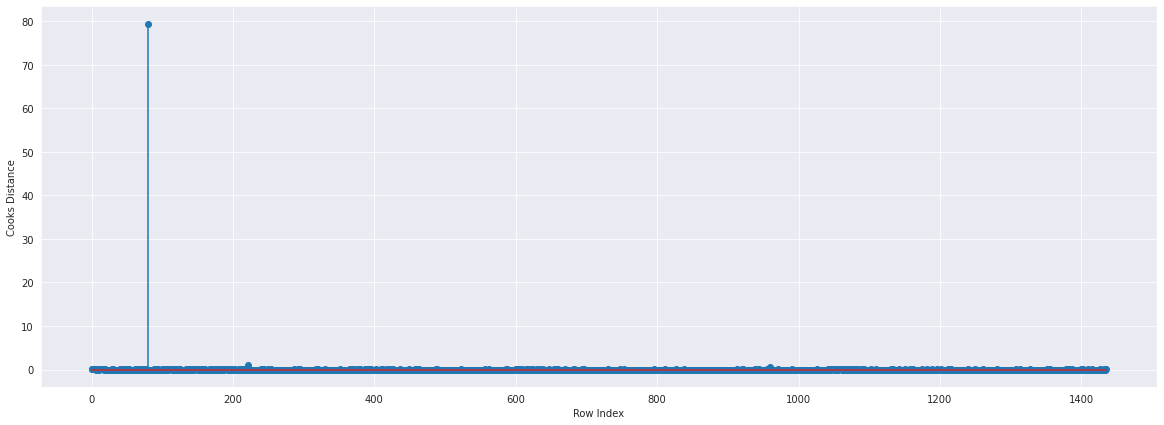

In [45]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624141171)

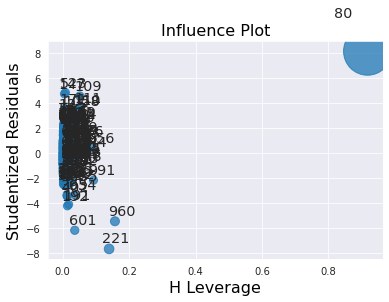

In [47]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model1)
plt.show()

###We can improve accuracy by removing influencial points

In [54]:
data_new=data.drop(data.index[[80,960,221,601]],axis=0).reset_index()
Data=data_new.drop(['index'],axis=1)
Data.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
model2=smf.ols('Price~Age+KM+HP+Doors+CC+Gears+Quarterly_Tax+Weight', data=Data).fit()

In [51]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1431.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:30:09   Log-Likelihood:                -12191.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.618e+04   1419.607    -11.399      0.000    -1.9e+04   -1.34e+04
Age            -110.3302      2.444    -45.149      0.000    -115.124    -105.537
KM               -0.0177      0.001    -14.976      0.000      -0.020      -0.015
HP               34.3032      2.712     12.647      0.000      28.983      39.624
Doors          -144.0434     36.899     -3.904      0.000    -216.426     -71.661
CC               -3.6876      0.297    -12.420      0.000      -4.270      -3.105
Gears           468.2073    177.621      2.636      0.008     119.779     816.635
Quarterly_Tax     3.6780      1.362      2.701      0.007       1.007       6.349
Weight           32.1958      1.283     25.085      0.000      29.678      34.713
==============================================================================
Omnibus:                       75.065   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.214
Skew:                           0.120   Prob(JB):                     6.28e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
final_model = model2

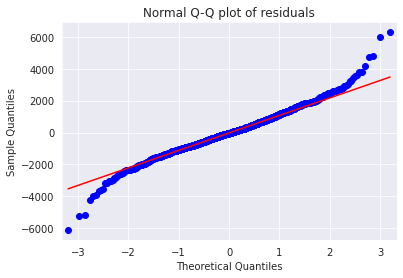

In [58]:
sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
final_model_preds = final_model.predict(Data)


Text(0, 0.5, 'Predicted values')

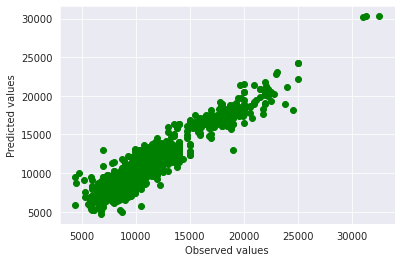

In [60]:
plt.scatter(Data["Price"],final_model_preds,color='Green');plt.xlabel("Observed values");plt.ylabel("Predicted values")

In [62]:
final_model.rsquared

0.8894191849749751

###Regression Models
Linear Regression 

In [66]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [67]:
X.head()

,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [68]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [69]:
print(X.shape)
print(y.shape)

(1436, 8)
(1436,)


In [73]:
#Splitting testdata into x_train,x_test,y_train,y_test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [74]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1148, 8)
Shape of X_test:  (288, 8)
Shape of y_train:  (1148,)
Shape of y_test (288,)


###Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [76]:
LR.fit(X_train, y_train)

LinearRegression()

In [79]:
#Prediciting Y from Linear regression Model
y_pred = LR.predict(X_test)

In [81]:
from sklearn import metrics
print('Mean Absolute Error (MAE)       :', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error              :', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error (RMSE)  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R Square                        :', metrics.r2_score(y_test , y_pred))

Mean Absolute Error (MAE)       : 995.5863850095999
Mean Squared Error              : 1950244.9877904272
Root Mean Squared Error (RMSE)  : 1396.5117213222477
R Square                        : 0.8538352805672252


###Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge = Ridge(alpha=1777, fit_intercept=True)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [89]:
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', Ridge(alpha=1777, fit_intercept=True))
])

In [90]:
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=1777))])

In [91]:
# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)

In [92]:
from sklearn import metrics
print('Mean Absolute Error (MAE)       :', metrics.mean_absolute_error(y_test , y_pred_ridge_test))
print('Mean Squared Error              :', metrics.mean_squared_error(y_test , y_pred_ridge_test))
print('Root Mean Squared Error (RMSE)  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred_ridge_test)))
print('R Square                        :', metrics.r2_score(y_test , y_pred_ridge_test))

Mean Absolute Error (MAE)       : 1441.7368377365394
Mean Squared Error              : 4313267.34385502
Root Mean Squared Error (RMSE)  : 2076.8407122008707
R Square                        : 0.6767341974469587


###Lasso Regression

In [93]:
from sklearn.linear_model import Lasso

In [94]:
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol = 0.0199, max_iter=2000))
])

In [95]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=2.36, max_iter=2000, tol=0.0199))])

In [96]:
# Predicting R2 Score the Test set results
y_pred_lasso_test = ridge_pipe.predict(X_test)

In [97]:
from sklearn import metrics
print('Mean Absolute Error (MAE)       :', metrics.mean_absolute_error(y_test , y_pred_lasso_test))
print('Mean Squared Error              :', metrics.mean_squared_error(y_test , y_pred_lasso_test))
print('Root Mean Squared Error (RMSE)  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred_lasso_test)))
print('R Square                        :', metrics.r2_score(y_test , y_pred_lasso_test))

Mean Absolute Error (MAE)       : 1441.7368377365394
Mean Squared Error              : 4313267.34385502
Root Mean Squared Error (RMSE)  : 2076.8407122008707
R Square                        : 0.6767341974469587


###Random Forest Regression

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 40)

In [100]:
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1200, random_state=40)

In [101]:
# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)

In [102]:
from sklearn import metrics
print('Mean Absolute Error (MAE)       :', metrics.mean_absolute_error(y_test , y_pred_rf_test))
print('Mean Squared Error              :', metrics.mean_squared_error(y_test , y_pred_rf_test))
print('Root Mean Squared Error (RMSE)  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred_rf_test)))
print('R Square                        :', metrics.r2_score(y_test , y_pred_rf_test))

Mean Absolute Error (MAE)       : 814.4475405092593
Mean Squared Error              : 1103341.8280829908
Root Mean Squared Error (RMSE)  : 1050.4007940224487
R Square                        : 0.9173080050199698


###Measuring the Error 

In [105]:
models = [('Statsmodel', np.sqrt(metrics.mean_squared_error(y_test , y_pred)), final_model.rsquared),
          ('Linear Regression', np.sqrt(metrics.mean_squared_error(y_test , y_pred)), metrics.r2_score(y_test , y_pred)),
          ('Ridge Regression', np.sqrt(metrics.mean_squared_error(y_test , y_pred_ridge_test)), metrics.r2_score(y_test , y_pred_ridge_test)),
          ('Lasso Regression',  np.sqrt(metrics.mean_squared_error(y_test , y_pred_lasso_test)), metrics.r2_score(y_test , y_pred_lasso_test)),
          ('Random Forest Regression', np.sqrt(metrics.mean_squared_error(y_test , y_pred_rf_test)),metrics.r2_score(y_test , y_pred_rf_test))   
         ]

In [106]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(test)'])
predict

,Model,RMSE,R2_Score(test)
0,Statsmodel,1396.511721,0.889419
1,Linear Regression,1396.511721,0.853835
2,Ridge Regression,2076.840712,0.676734
3,Lasso Regression,2076.840712,0.676734
4,Random Forest Regression,1050.400794,0.917308


###We have run 5 models out of which Random forest refressor has highest accuracy